In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [34]:
# Load dataset

df = pd.read_csv("/kaggle/input/traffic/US_Accidents_March23.csv", nrows=100000)


In [7]:
# Display first few rows
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [8]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [10]:
# Load dataset (only required columns for analysis)
columns_needed = ['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
                  'Weather_Condition', 'Visibility(mi)', 'Precipitation(in)', 
                  'Temperature(F)', 'Wind_Speed(mph)']

In [11]:
# 🔹 Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [12]:
# 🔹 Handling Missing Values
df.dropna(inplace=True)

In [16]:
print(df['Start_Time'].dtype)

object


In [17]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [18]:
print(df['Start_Time'].isna().sum())  # Count NaT values

0


In [19]:
print(df[df['Start_Time'].isna()].head())

Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 46 columns]


In [20]:
# Extract features
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.dayofweek

In [21]:
print(df[['Start_Time', 'Hour', 'Day']].head())  # Verify output

Empty DataFrame
Columns: [Start_Time, Hour, Day]
Index: []


In [33]:
print(df.shape)  # Check number of rows and columns
print(df.head())  # Preview data

(0, 48)
Empty DataFrame
Columns: [ID, Source, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight, Hour, Day]
Index: []

[0 rows x 48 columns]


In [25]:
print(df['Start_Time'].dtype)  # Should be datetime64[ns]

datetime64[ns]


In [35]:
print(df.shape)  # Should have rows

(100000, 46)


In [37]:
print(df.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [38]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')  # Convert to datetime
df['Hour'] = df['Start_Time'].dt.hour  # Extract the hour

In [39]:
print(df[['Start_Time', 'Hour']].head())  # See if 'Hour' is extracted properly

           Start_Time  Hour
0 2016-02-08 05:46:00     5
1 2016-02-08 06:07:59     6
2 2016-02-08 06:49:27     6
3 2016-02-08 07:23:34     7
4 2016-02-08 07:39:07     7


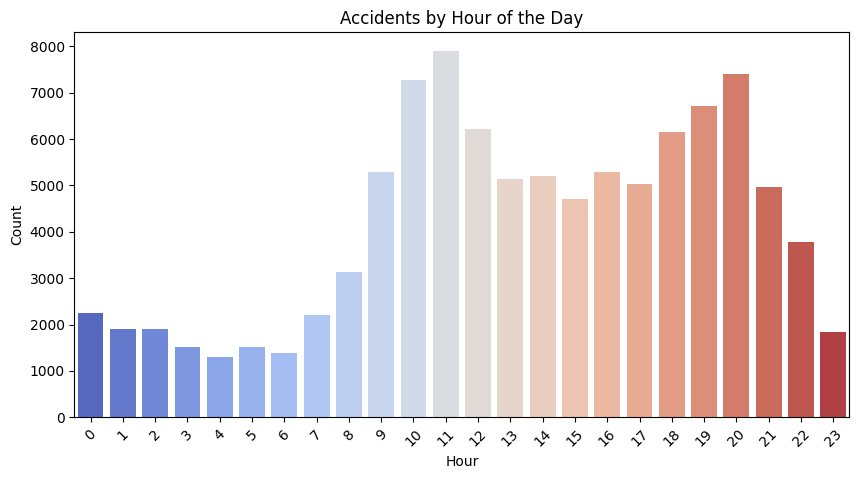

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

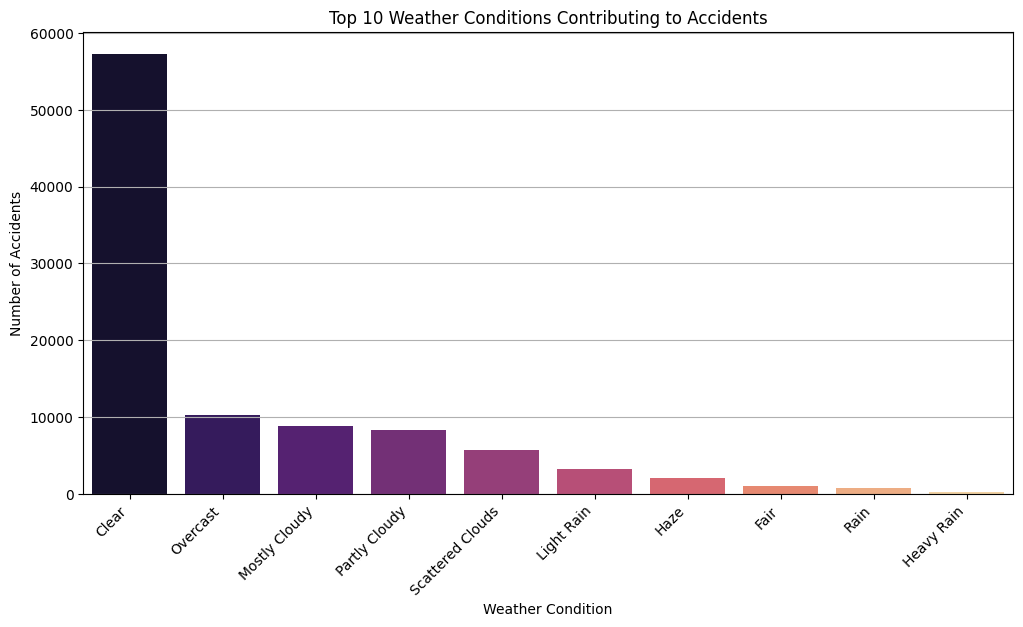

In [41]:
# 🔹 Plot: Accidents by Weather Condition
plt.figure(figsize=(12, 6))
top_weather = df['Weather_Condition'].value_counts().nlargest(10)  # Top 10 weather conditions
sns.barplot(x=top_weather.index, y=top_weather.values, palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Weather Conditions Contributing to Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Weather Condition")
plt.grid(axis='y')
plt.show()


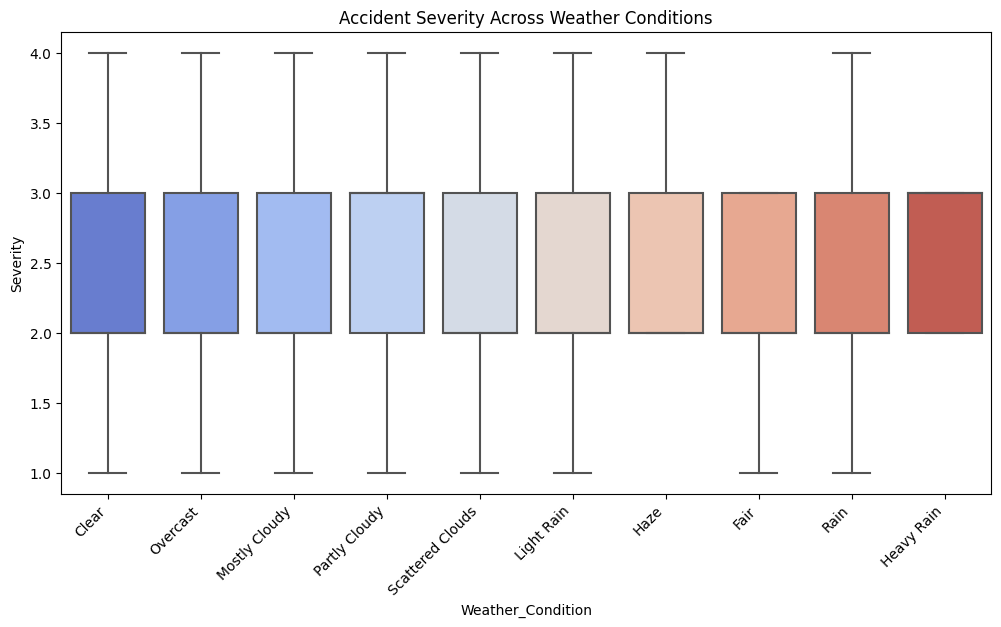

In [42]:
# 🔹 Plot: Severity of Accidents in Different Weather Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=df, palette='coolwarm', order=top_weather.index)
plt.xticks(rotation=45, ha='right')
plt.title("Accident Severity Across Weather Conditions")
plt.show()


In [43]:
# 🔹 Heatmap: Accident Hotspots
m = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)
heat_data = list(zip(df['Start_Lat'], df['Start_Lng']))
HeatMap(heat_data).add_to(m)


In [44]:
# Save and display map
m.save("accident_hotspots.html")
print("🔥 Heatmap saved as 'accident_hotspots.html'. Open it in a browser to view.")

🔥 Heatmap saved as 'accident_hotspots.html'. Open it in a browser to view.


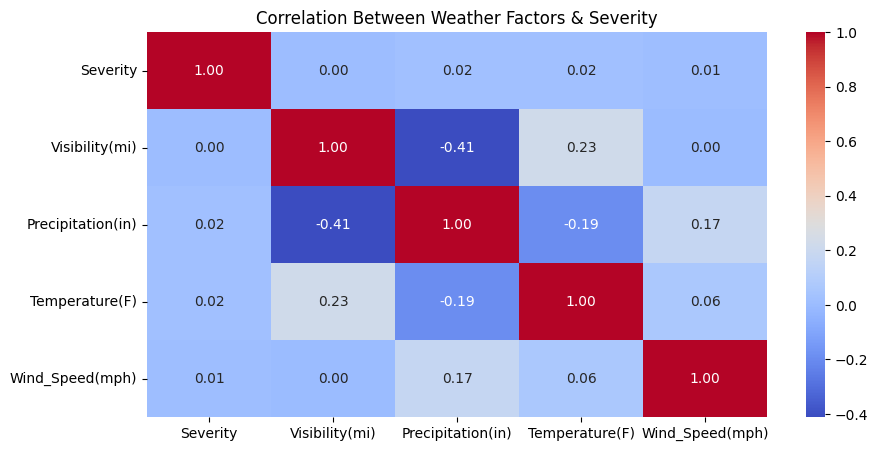

In [45]:
# 🔹 Correlation Analysis
plt.figure(figsize=(10, 5))
sns.heatmap(df[['Severity', 'Visibility(mi)', 'Precipitation(in)', 'Temperature(F)', 'Wind_Speed(mph)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Weather Factors & Severity")
plt.show()